In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import copy
import networkx as nx

## Load data 
Data comes from http://stat-computing.org/dataexpo/2009/. 
Flight data relates to the year 2007 (see file StatComp_MER) 

In [ ]:
# Load data
Flights = pd.read_pickle("Flights.pkl")
Airports = pd.read_pickle("Airports.pkl")
# Select variables from which to create network. Must contain two columns of nodes, since 
# nx.from_pandas_edgelist() views each row as an edge. Can also contains attributes, e.g. Distance. 
FlightsNx = Flights[["Origin","Dest","Distance"]]
# Take counts (i.e. how many flights in the dataset)
counts = pd.DataFrame(Flights.groupby(["Origin","Dest"])["Year"].count())
counts.columns = "count"
FlightsNx = FlightsNx.merge(counts, how = 'left', on = ["Origin","Dest"])

#### Implement as network. 
For function documentation, see:  
https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html?highlight=from_pandas_edgelist#networkx.convert_matrix.from_pandas_edgelist  


In [86]:
Network = nx.from_pandas_edgelist(FlightsNx, source = "Origin", target = "Dest", edge_attr = True)
print(nx.info(Network))

Name: 
Type: Graph
Number of nodes: 310
Number of edges: 2868
Average degree:  18.5032


#### Sparse 

In [85]:
# calculate L_max:  
print("L_max = {}".format(len(Network.nodes)*(len(Network.nodes)-1)*(1/2)))
print(2868/47895)

L_max = 47895.0
0.05988098966489195


## Degree calculations

### Degree distribution

In [47]:
# docs: https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality 
# Find degree: 
degree_dict = nx.algorithms.centrality.degree_centrality(Network) 
degree_values = list(degree.values())
# Create dataframe
degrees = pd.DataFrame(degree_values)
degrees.columns = ["degree"]
degrees["degree_unnormalized"] = degrees["degree"]*(len(Network.nodes)-1)
degrees["airport"] = degree_dict.keys()
degrees.head()

In [93]:
degrees["degree_unnormalized"].sum()/degrees.shape[0]

18.503225806451614

In [59]:
# See most important airports in dataset.
degrees.sort_values(by = "degree_unnormalized",ascending = False).head()

,degree,degree_unnormalized,airport
70,0.601942,186.0,ATL
72,0.498382,154.0,ORD
111,0.427184,132.0,DFW
77,0.420712,130.0,MSP
28,0.398058,123.0,SLC


In [132]:
print(degrees.loc[(degrees["degree_unnormalized"] < 5)].shape[0])
print(degrees.loc[(degrees["degree_unnormalized"] > 100)].shape[0])

120
9


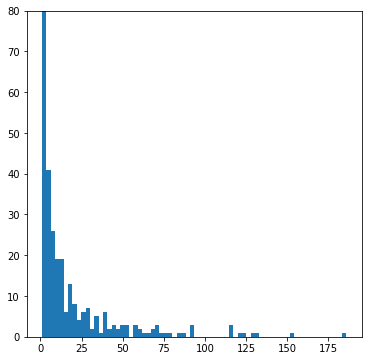

In [124]:
# Degree distribution
fig, ax = plt.subplots(figsize = (6,6))
plt.hist(degrees["degree_unnormalized"], bins = 70)
plt.ylim(0,80)
plt.show()

## Betweenness centrality
#### (node) betweenness centrality

In [146]:
btwn = nx.betweenness_centrality(Network)

In [170]:
betweenness = list(btwn.values())
btwn_df = pd.DataFrame(betweenness)
btwn_df.columns = ["betweenness"]
btwn_df["airport"] = btwn.keys()

In [182]:
btwn_df.sort_values(by = "betweenness", ascending = False)
Node_char = degrees.merge(btwn_df, on= "airport")

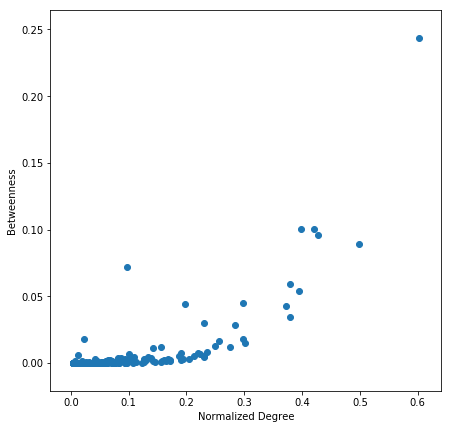

In [189]:
# Betweenness vs. degree
fig, ax = plt.subplots(figsize = (7,7))
plt.scatter(Node_char["degree"],Node_char["betweenness"])
plt.xlabel("Normalized Degree")
plt.ylabel("Betweenness")
plt.show()

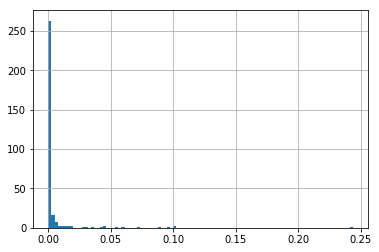

In [193]:
Node_char["betweenness"].hist(bins = 100)

In [194]:
avg_shrt_path_len = nx.average_shortest_path_length(Network)


In [204]:
avg_shrt_path_len

2.3133312454327175

In [ ]:
nx.average_shortest_path_length(Network)


In [203]:
test = FlightsNx.loc[(FlightsNx["Origin"] != "ATL") & (FlightsNx["Dest"] != "ATL")]
Nettest = nx.from_pandas_edgelist(test, source = "Origin", target = "Dest", edge_attr = None)
ATL_avg = nx.average_shortest_path_length(Nettest)
print(ATL_avg)

2.3350512969415407


In [ ]:
Network = nx.from_pandas_edgelist(FlightsNx, source = "Origin", target = "Dest", edge_attr = True)
print(nx.info(Network))

In [201]:
FlightsNx.head()

,Origin,Dest,Distance
0,SMF,ONT,389
1,SMF,PDX,479
2,SMF,PDX,479
3,SMF,PDX,479
4,SMF,PDX,479


In [195]:
avg_shrt_path_len

2.3133312454327175